<a href="https://colab.research.google.com/github/SpineSoloh/Luyten-a/blob/main/Car_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# importing dataframe

In [ ]:
C_Data = pd.read_csv('Car-Data.csv')

# Describing the dataframe

In [ ]:
print(C_Data.describe())
print(C_Data.shape)
print(C_Data.head())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

# Cleaning Data

In [ ]:
print(C_Data.isnull()) # finding and replacing null value
print(C_Data.isnull().sum())
print(C_Data.isnull().sum().sum())

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fu

In [ ]:
C_Data2 = (C_Data.fillna(value=0))
print(C_Data2)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

# Finding duplicated Values

In [ ]:
print(C_Data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool


# extract the input variable (horsepower) and target variable (price)

In [ ]:
X = C_Data[['horsepower']]
y = C_Data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # split the data into training and testing sets
model = LinearRegression()
model.fit(X_train, y_train) # create a linear regression model and fit it to the training data
print("Intercept coefficient: ", model.intercept_)
print("Slope coefficient: ", model.coef_[0]) # print the intercept and slope coefficients

Intercept coefficient:  -4438.686204910015
Slope coefficient:  170.5382744589305


# evaluate the model on the test set

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R2 score: ", r2)

MSE:  25821021.44827711
R2 score:  0.6089937976509767


# Create a linear regression model and fit it to the training data

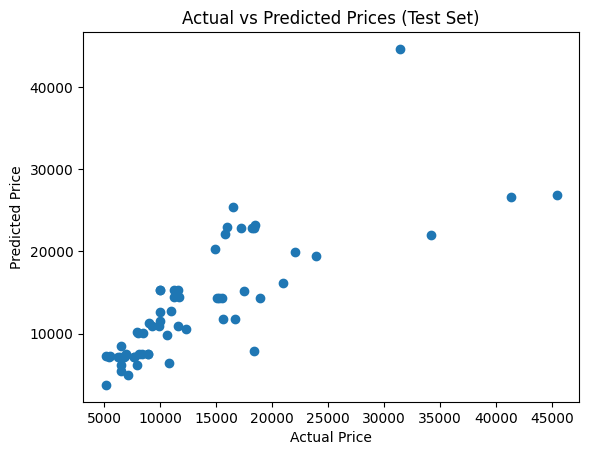

In [ ]:
y_pred = model.predict(X_test) # Make predictions on the test set
plt.plot(y_test, y_pred, 'o') # Ploting the actual vs predicted prices for each car in the test set
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.show()

# Calculate the standardized errors and Creating an histogram of the standardized errors

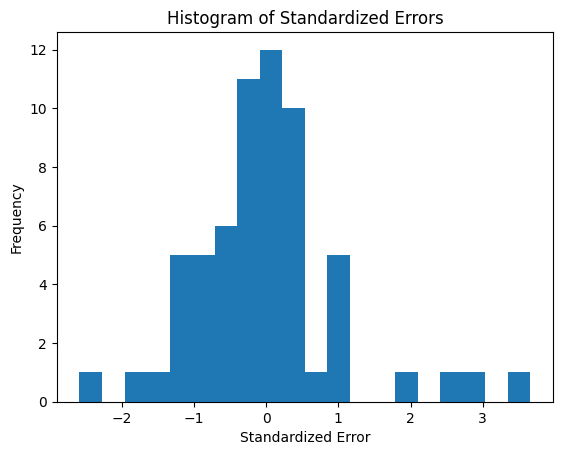

In [ ]:
std_errors = (errors - np.mean(errors)) / np.std(errors)
plt.hist(std_errors, bins=20)
plt.xlabel("Standardized Error")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Errors")
plt.show()